In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from scipy.stats import kruskal

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
class Flags():
    export=True
    out_path = 'assets/0.1/'
flags = Flags()

In [4]:
reduced = pd.read_csv(flags.out_path + 'dataset_reduced.csv')
y_reduced = reduced['% Silica Concentrate']

# Kmeans Clustering - PCA

In [5]:
X_reduced = pd.read_csv(flags.out_path + 'dataset_pca.csv')

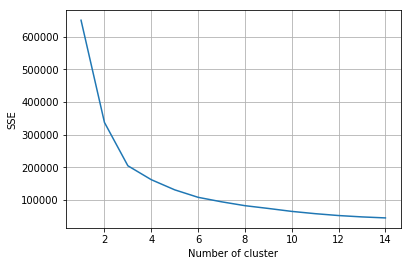

In [5]:
sse = {}
for k in range(1, 15):
    model = KMeans(n_clusters=k, max_iter=1000).fit(X_reduced)
    #data["clusters"] = model.labels_
    #print(data["clusters"])
    sse[k] = model.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid(True)
plt.savefig(flags.out_path + 'graph_SSE_pca.eps', bbox_inches='tight')
plt.savefig(flags.out_path + 'graph_SSE_pca.png', bbox_inches='tight')

In [9]:
n_clusters = 3
colors = ['blue', 'green', 'red']

model = KMeans(n_clusters=n_clusters)
model.fit(X_reduced)

unique, counts = np.unique(model.labels_, return_counts=True)
print(unique, counts)
if flags.export: 
    pd.DataFrame(model.labels_).to_csv(flags.out_path + "result_pca.csv", index=False)

[0 1 2] [20821 35993 16932]


Cluster 0, median: 2.08+-1.16 (std)
Cluster 1, median: 2.34+-1.17 (std)
Cluster 2, median: 1.61+-0.86 (std)


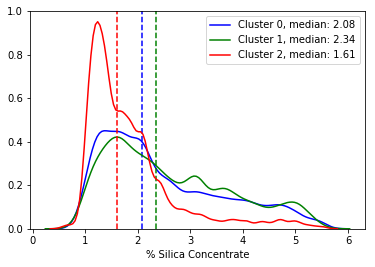

In [7]:
for i in range(0, n_clusters):
    cluster = y_reduced[model.labels_ == i]
    median = cluster.median()
    std = cluster.std()
    
    sns.distplot(cluster, label='Cluster %d, median: %.2f'%(i, median), hist=False, color=colors[i])
    plt.axvline (median, linestyle='--', color=colors[i])
    print('Cluster %d, median: %.2f+-%.2f (std)'%(i, median, std))
if flags.export: 
    plt.savefig(flags.out_path + 'graph_kde_pca.eps')
    plt.savefig(flags.out_path + 'graph_kde_pca.png')

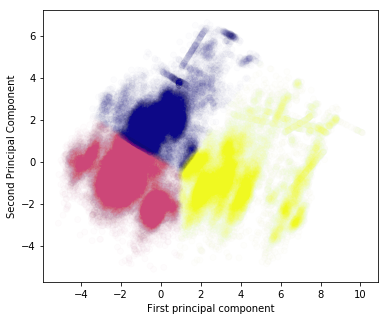

In [10]:
plt.figure(figsize=(6,5))
plt.scatter(X_reduced['0'],X_reduced['1'],c=model.labels_,cmap='plasma', alpha=0.01)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
if flags.export: 
    plt.savefig(flags.out_path + 'graph_clusters_pca.eps')
    plt.savefig(flags.out_path + 'graph_clusters_pca.png')

In [9]:
s, p = kruskal(y_reduced[model.labels_ == 0],
        y_reduced[model.labels_ == 1],
        y_reduced[model.labels_ == 2])
print (s, p)
if p<0.05: print ("Significant")
else: print ("Not significant")

6115.666348224248 0.0
Significant


# Kmeans Clustering - TSNE

In [11]:
X_reduced = pd.read_csv(flags.out_path + 'dataset_tsne.csv')

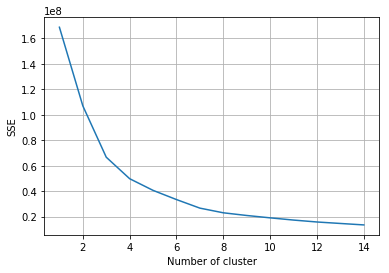

In [11]:
sse = {}
for k in range(1, 15):
    model = KMeans(n_clusters=k, max_iter=1000).fit(X_reduced)
    #data["clusters"] = model.labels_
    #print(data["clusters"])
    sse[k] = model.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid(True)
plt.savefig(flags.out_path + 'graph_SSE_tsne.eps', bbox_inches='tight')
plt.savefig(flags.out_path + 'graph_SSE_tsne.png', bbox_inches='tight')

In [12]:
n_clusters = 3
colors = ['blue', 'green', 'red']

model = KMeans(n_clusters=n_clusters)
model.fit(X_reduced)

unique, counts = np.unique(model.labels_, return_counts=True)
print(unique, counts)
if flags.export: 
    pd.DataFrame(model.labels_).to_csv(flags.out_path + "result_pca.csv", index=False)

[0 1 2] [23860 25854 24032]


Cluster 0, median: 1.95+-1.09 (std)
Cluster 1, median: 2.33+-1.20 (std)
Cluster 2, median: 1.69+-0.98 (std)


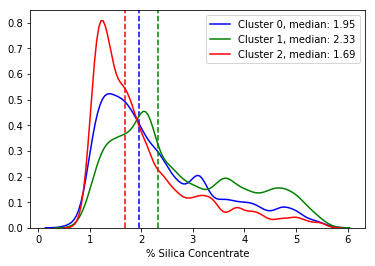

In [13]:
for i in range(0, n_clusters):
    cluster = y_reduced[model.labels_ == i]
    median = cluster.median()
    std = cluster.std()
    
    sns.distplot(cluster, label='Cluster %d, median: %.2f'%(i, median), hist=False, color=colors[i])
    plt.axvline (median, linestyle='--', color=colors[i])
    print('Cluster %d, median: %.2f+-%.2f (std)'%(i, median, std))
if flags.export: 
    plt.savefig(flags.out_path + 'graph_kde_tsne.eps')
    plt.savefig(flags.out_path + 'graph_kde_tsne.png')

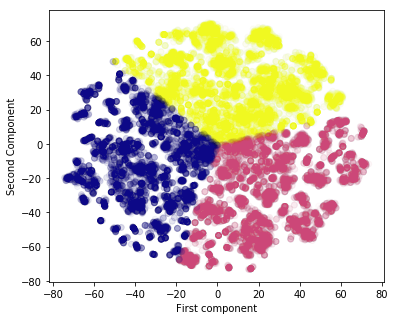

In [14]:
plt.figure(figsize=(6,5))
plt.scatter(X_reduced['0'],X_reduced['1'],c=model.labels_,cmap='plasma', alpha=0.02)
plt.xlabel('First component')
plt.ylabel('Second Component')
if flags.export: 
    plt.savefig(flags.out_path + 'graph_clusters_tsne.eps')
    plt.savefig(flags.out_path + 'graph_clusters_tsne.png')

In [15]:
s, p = kruskal(y_reduced[model.labels_ == 0],
        y_reduced[model.labels_ == 1],
        y_reduced[model.labels_ == 2])
print (s, p)
if p<0.05: print ("Significant")
else: print ("Not significant")

5437.160273879952 0.0
Significant


# Kmeans Clustering - Normalized

In [13]:
X_reduced = pd.read_csv(flags.out_path + 'dataset_normalized.csv')

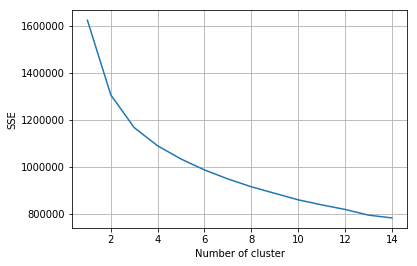

In [17]:
sse = {}
for k in range(1, 15):
    model = KMeans(n_clusters=k, max_iter=1000).fit(X_reduced)
    #data["clusters"] = model.labels_
    #print(data["clusters"])
    sse[k] = model.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid(True)
plt.savefig(flags.out_path + 'graph_SSE_normalized.eps')
plt.savefig(flags.out_path + 'graph_SSE_normalized.png')

In [14]:
n_clusters = 3
colors = ['blue', 'green', 'red']

model = KMeans(n_clusters=n_clusters)
model.fit(X_reduced)
unique, counts = np.unique(model.labels_, return_counts=True)
print(unique, counts)
if flags.export: 
    pd.DataFrame(model.labels_).to_csv(flags.out_path + "result_pca.csv", index=False)

[0 1 2] [20272 17042 36432]


Cluster 0, median: 1.61+-0.87 (std)
Cluster 1, median: 2.08+-1.16 (std)
Cluster 2, median: 2.33+-1.17 (std)


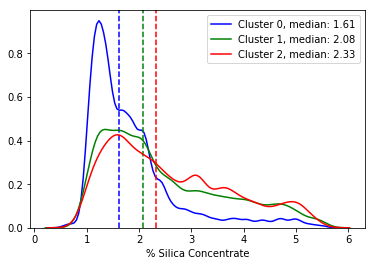

In [19]:
for i in range(0, n_clusters):
    cluster = y_reduced[model.labels_ == i]
    median = cluster.median()
    std = cluster.std()
    
    sns.distplot(cluster, label='Cluster %d, median: %.2f'%(i, median), hist=False, color=colors[i])
    plt.axvline (median, linestyle='--', color=colors[i])
    print('Cluster %d, median: %.2f+-%.2f (std)'%(i, median, std))
if flags.export: 
    plt.savefig(flags.out_path + 'graph_kde_normalized.eps')
    plt.savefig(flags.out_path + 'graph_kde_normalized.png')

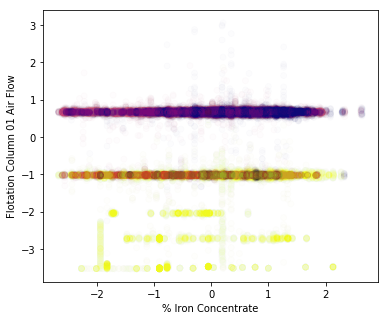

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(X_reduced['% Iron Concentrate'], X_reduced['Flotation Column 01 Air Flow'],c=model.labels_, cmap='plasma',alpha=0.01)
plt.xlabel('% Iron Concentrate')
plt.ylabel('Flotation Column 01 Air Flow')

if flags.export: 
    plt.savefig(flags.out_path + 'graph_clusters_normalized.eps')
    plt.savefig(flags.out_path + 'graph_clusters_normalized.png')

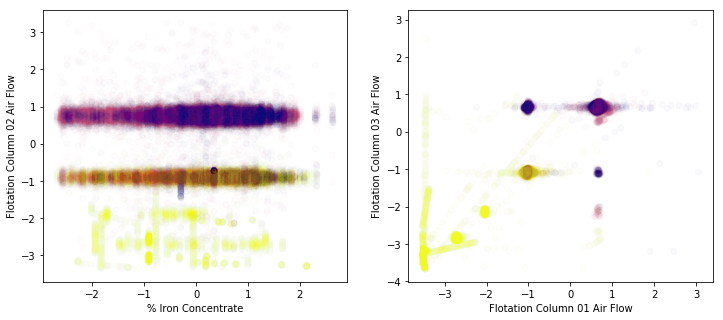

In [21]:
# 4 variáveis mais relacionadas
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.scatter(X_reduced['% Iron Concentrate'], X_reduced['Flotation Column 02 Air Flow'],c=model.labels_, cmap='plasma', alpha=0.01)
ax1.set_xlabel('% Iron Concentrate')
ax1.set_ylabel('Flotation Column 02 Air Flow')


ax2.scatter(X_reduced['Flotation Column 01 Air Flow'], X_reduced['Flotation Column 03 Air Flow'],c=model.labels_, cmap='plasma', alpha=0.02)
ax2.set_xlabel('Flotation Column 01 Air Flow')
ax2.set_ylabel('Flotation Column 03 Air Flow')

if flags.export: 
    plt.savefig(flags.out_path + 'graph_clusters_normalized2.eps')
    plt.savefig(flags.out_path + 'graph_clusters_normalized2.png')

In [22]:
s, p = kruskal(y_reduced[model.labels_ == 0],
        y_reduced[model.labels_ == 1],
        y_reduced[model.labels_ == 2])
print (s, p)
if p<0.05: print ("Significant")
else: print ("Not significant")

5753.722185571798 0.0
Significant


# DBSCAN PCA (just a test)

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
X_reduced = pd.read_csv(flags.out_path + 'dataset_pca.csv')

NameError: name 'pd' is not defined

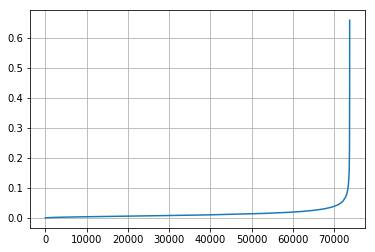

In [24]:
# Theoretical elbow evaluation, but for me it didnt worked
n = 73746#max: 73746
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X_reduced.head(n))

distances, indices = neigh.kneighbors(X_reduced.head(n))

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)
plt.grid(True)

Classes encontradas: {-1: 5665, 0: 42925, 1: 10725, 2: 374, 3: 311}


Text(0.5, 1.0, 'Clusters identificados')

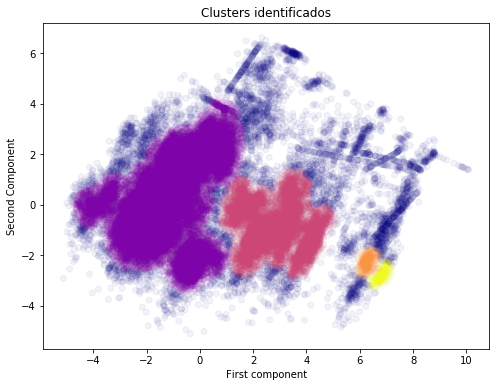

In [9]:
n = 60000
model = DBSCAN(min_samples=140, eps=0.3)
model.fit(X_reduced.head(n))
unique, counts = np.unique(model.labels_, return_counts=True)
print("Classes encontradas: " + str(dict(zip(unique, counts))))

plt.figure(figsize=(8,6))
plt.scatter(X_reduced.head(n)['0'],X_reduced.head(n)['1'],c=model.labels_,cmap='plasma', alpha=0.05)
plt.xlabel('First component')
plt.ylabel('Second Component')
plt.title("Clusters identificados")
#if flags.export: 
#    plt.savefig(flags.out_path + 'graph_clustersOP_tsne.eps')

Cluster 0, median: 1.90+-1.11 (std)
Cluster 1, median: 2.18+-1.15 (std)
Cluster 2, median: 3.11+-0.88 (std)
Cluster 3, median: 3.11+-0.76 (std)


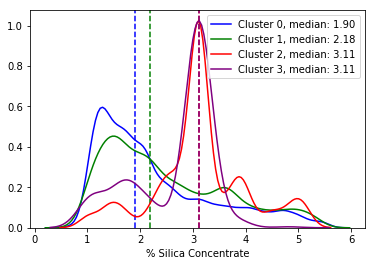

In [26]:
n_clusters = 4
colors = ['blue', 'green', 'red', 'purple']

for i in range(0, n_clusters):
    cluster = y_reduced.head(n)[model.labels_ == i]
    median = cluster.median()
    std = cluster.std()
    
    sns.distplot(cluster, label='Cluster %d, median: %.2f'%(i, median), hist=False, color=colors[i])
    plt.axvline (median, linestyle='--', color=colors[i])
    print('Cluster %d, median: %.2f+-%.2f (std)'%(i, median, std))
#if flags.export: 
#    plt.savefig(flags.out_path + 'graph_kde_tsne.eps')

In [27]:
s, p = kruskal(y_reduced.head(n)[model.labels_ == 0],
        y_reduced.head(n)[model.labels_ == 1],
        y_reduced.head(n)[model.labels_ == 2])
print (s, p)
if p<0.05: print ("Significant")
else: print ("Not significant")

679.0398473243321 3.534847296969178e-148
Significant
